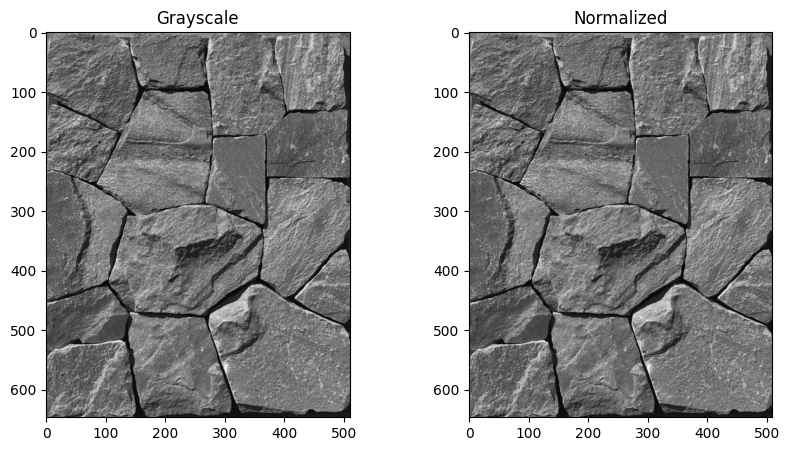

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess image
def preprocess_image(image_path):
    image = cv2.imread(image_path)  # Load image
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    normalized_image = gray_image / 255.0  # Normalize to [0, 1]
    return gray_image, normalized_image

# Example usage
image_path = 'image2.jpeg'
gray_image, normalized_image = preprocess_image(image_path)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(gray_image, cmap='gray'), plt.title('Grayscale')
plt.subplot(122), plt.imshow(normalized_image, cmap='gray'), plt.title('Normalized')
plt.show()

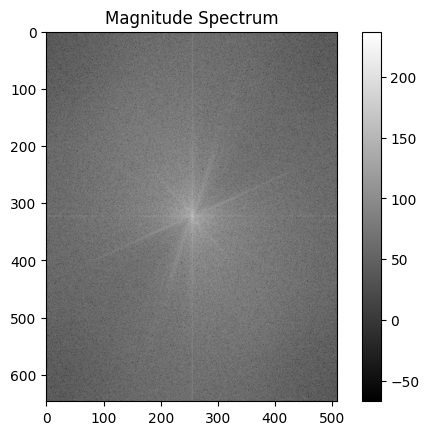

In [ ]:
def compute_dft(image):
    dft = np.fft.fft2(image)  # Compute DFT
    dft_shift = np.fft.fftshift(dft)  # Shift zero frequency to the center
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift))  # Compute magnitude spectrum
    return dft, dft_shift, magnitude_spectrum

dft, dft_shift, magnitude_spectrum = compute_dft(normalized_image)

# Display magnitude spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.colorbar()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

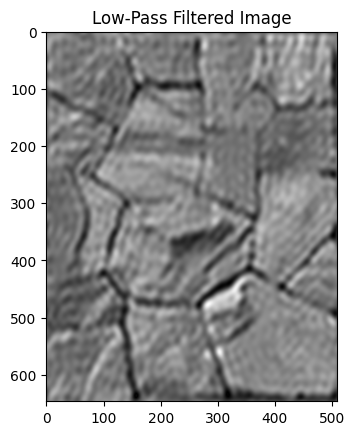

In [ ]:
def apply_low_pass_filter(dft_shift, size=30):
    rows, cols = dft_shift.shape
    crow, ccol = rows // 2, cols // 2  # Center coordinates
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-size:crow+size, ccol-size:ccol+size] = 1  # Low-pass mask
    filtered_dft = dft_shift * mask  # Apply filter
    return filtered_dft

# Apply LPF
lpf_filtered_dft = apply_low_pass_filter(dft_shift)
lpf_image = np.abs(np.fft.ifft2(np.fft.ifftshift(lpf_filtered_dft)))

# Visualize filtered image
plt.imshow(lpf_image, cmap='gray')
plt.title('Low-Pass Filtered Image')
plt.show()


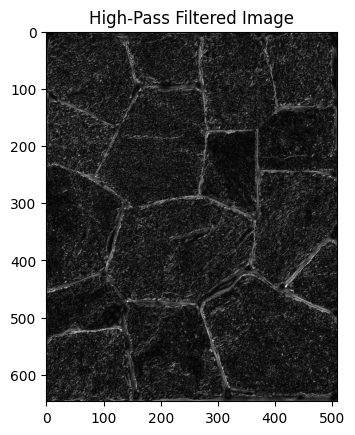

In [ ]:
def apply_high_pass_filter(dft_shift, size=30):
    rows, cols = dft_shift.shape
    crow, ccol = rows // 2, cols // 2  # Center coordinates
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-size:crow+size, ccol-size:ccol+size] = 0  # High-pass mask
    filtered_dft = dft_shift * mask  # Apply filter
    return filtered_dft

# Apply HPF
hpf_filtered_dft = apply_high_pass_filter(dft_shift)
hpf_image = np.abs(np.fft.ifft2(np.fft.ifftshift(hpf_filtered_dft)))

# Visualize filtered image
plt.imshow(hpf_image, cmap='gray')
plt.title('High-Pass Filtered Image')
plt.show()


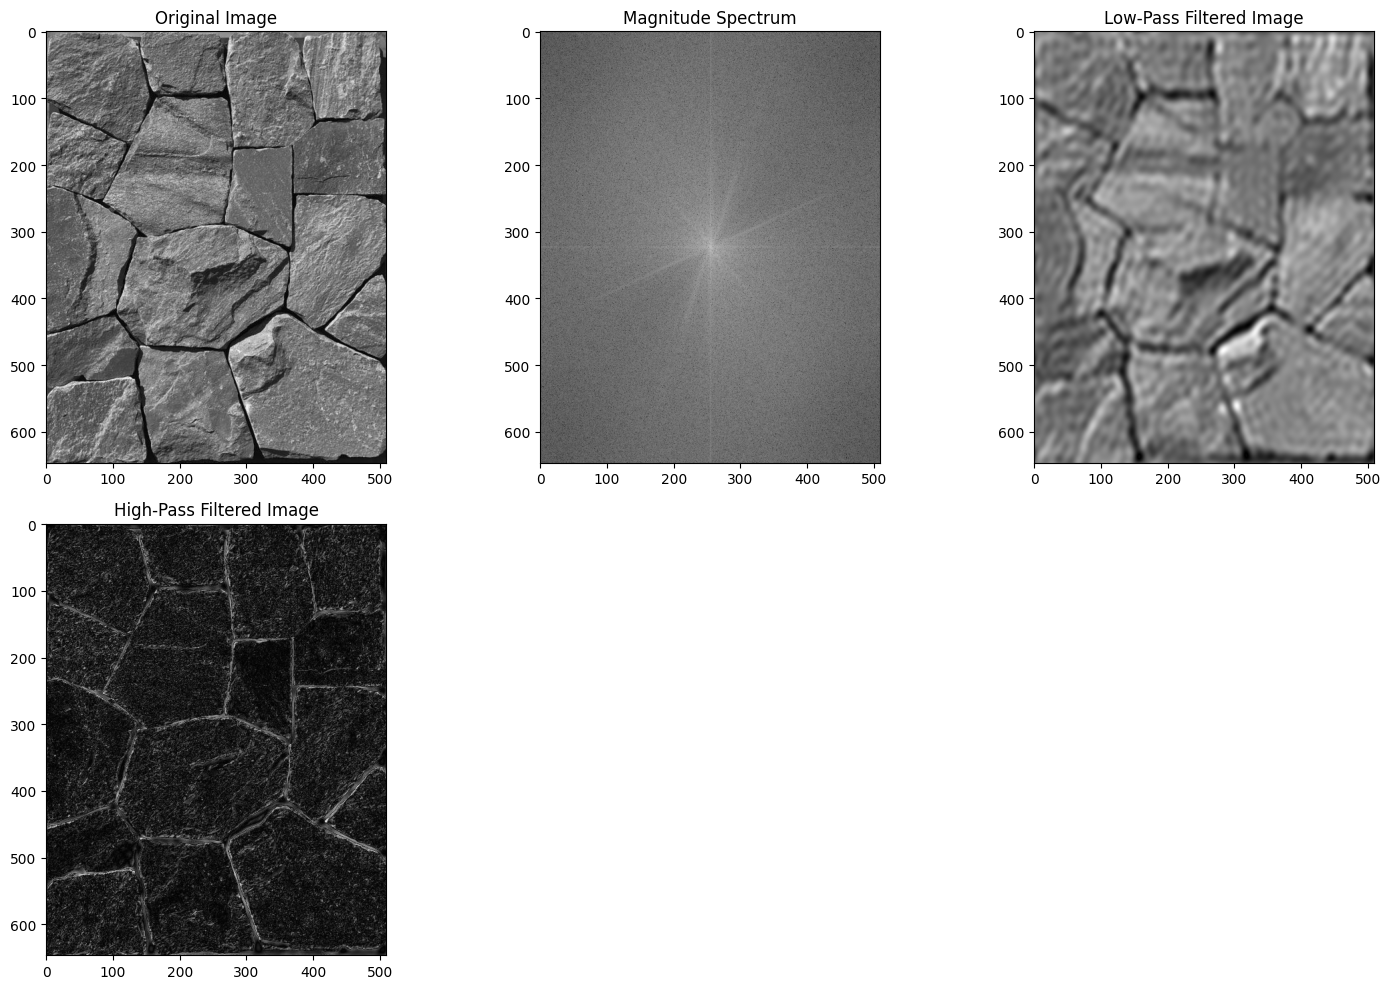

In [ ]:
# Visualization Summary
plt.figure(figsize=(15, 10))

plt.subplot(231), plt.imshow(gray_image, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
plt.subplot(233), plt.imshow(lpf_image, cmap='gray'), plt.title('Low-Pass Filtered Image')
plt.subplot(234), plt.imshow(hpf_image, cmap='gray'), plt.title('High-Pass Filtered Image')

plt.tight_layout()
plt.show()


(<Axes: title={'center': 'High-Pass Filtered Image'}>,
 Text(0.5, 1.0, 'High-Pass Filtered Image'))

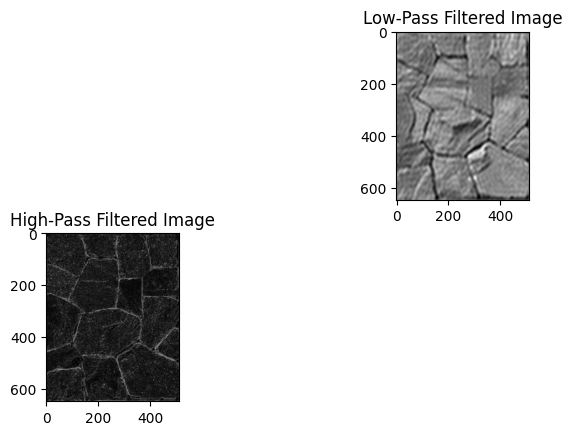

In [ ]:
# Inverse Fourier Transform (IFT)
def inverse_dft(filtered_dft):
    return np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_dft)))



lpf_image = inverse_dft(lpf_filtered_dft)
hpf_image = inverse_dft(hpf_filtered_dft)


plt.subplot(233), plt.imshow(lpf_image, cmap='gray'), plt.title('Low-Pass Filtered Image')
plt.subplot(234), plt.imshow(hpf_image, cmap='gray'), plt.title('High-Pass Filtered Image')
